In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
sn.set_style('darkgrid')

In [2]:
df = pd.read_csv(r"C:\Users\Usman\Downloads\diabetes (1).csv")

In [3]:
df.head(20)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [6]:
df.isna().any()

preg     False
plas     False
pres     False
skin     False
insu     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [7]:
df[['class']].nunique()

class    2
dtype: int64

In [8]:
target = df[['class']]

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
b = LabelEncoder()

In [11]:
target['Class'] = b.fit_transform(target['class'])

<ipython-input-11-367c3cc60aba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Class'] = b.fit_transform(target['class'])


In [12]:
target.head()

,class,Class
0,tested_positive,1
1,tested_negative,0
2,tested_positive,1
3,tested_negative,0
4,tested_positive,1


In [13]:
data = df.drop('class', axis = 1)

In [14]:
Target = target[['Class']]

In [15]:
from sklearn.model_selection import train_test_split

In [59]:
 X_train, X_test, y_train, y_test = train_test_split(data, Target, test_size=0.2, random_state=17)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model = KNeighborsClassifier()

In [19]:
model.fit(X_train, y_train)

C:\Users\Usman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [20]:
model.score(X_test, y_test)

0.7922077922077922

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
model1 = GaussianNB()

In [23]:
model1.fit(X_train, y_train)

C:\Users\Usman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [24]:
model1.score(X_test, y_test)

0.7727272727272727

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model2 = DecisionTreeClassifier()

In [27]:
model2.fit(X_train, y_train
          )

DecisionTreeClassifier()

In [28]:
model2.score(X_test, y_test)

0.7467532467532467

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model3 = RandomForestClassifier()

In [31]:
model3.fit(X_train, y_train)

<ipython-input-31-1f0472b386ae>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)


RandomForestClassifier()

In [32]:
model3.score(X_test, y_test)

0.7727272727272727

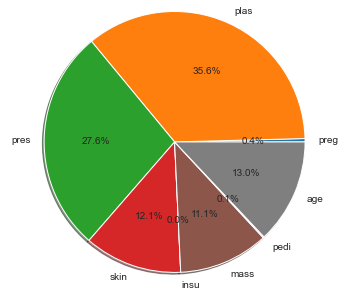

In [33]:
plt.axis("equal")
plt.pie(data.iloc[1],labels = data.columns, shadow=True, autopct='%1.1f%%',radius=1.5)
plt.show()

In [34]:
import cufflinks as cf

In [35]:
#!pip install plotly

In [36]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [37]:
#!pip install cufflinks

In [38]:
init_notebook_mode(connected=True)

In [39]:
cf.go_offline()

In [40]:
df.iplot(kind = 'bar', x = 'class', y = 'age')

In [41]:
df[['insu']].iplot(kind = 'hist')

In [42]:
df.iplot(x = 'class', y = 'insu', kind = 'bar')

C:\Users\Usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



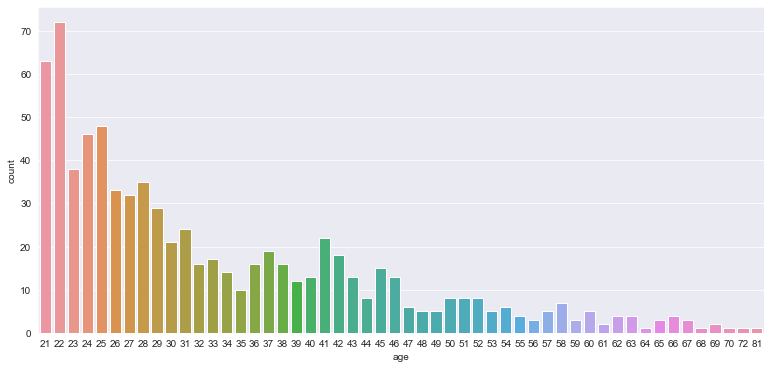

In [43]:
plt.figure(figsize=(13,6))
sn.countplot(df['age'])
plt.show()

In [44]:
from sklearn import svm

In [45]:
clf = svm.SVC(kernel='linear') # Linear Kernel

In [53]:
clf.fit(X_train, y_train)

C:\Users\Usman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(kernel='linear')

In [54]:
clf.predict(X_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [55]:
clf.score(X_test,y_test)

0.8246753246753247

In [56]:
p=clf.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,p)
cm

array([[98,  9],
       [18, 29]], dtype=int64)

Text(70.0, 0.5, 'True')

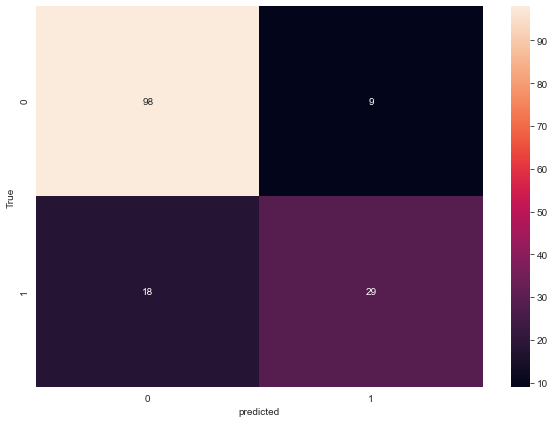

In [58]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("True")